## Capstone Part 2 - Campgrounds in the US. From https://ridb.recreation.gov/


In my capstone project, I plan to do an analysis of the data and then model the data to predict reservations for various campsites.
I plan to use EDA and various regression models
One risk would be weather. If a year has very different weather than the prior year, this can result in the prediction being off.
My initial goals, is to clean the data and run the complete analysis prior to modeling.
I plan to do a train, test, split to test the data.
In addition, I am taking a sample of the data at 1/100th of the initial amount for the dataset (2015).

There are 3 dates in my dataset and I converted them to datetime format. OrderDate has no null values while StartDate and EndDate have a significant number of null values. I'm thinking I may base my predictions primarily on the OrderDate, but will see once I do EDA with the dates. Also, I plan to use the string time (strftime) for the dates.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df15 = pd.read_csv('/Users/stevenmandel/Downloads/2015.csv',encoding='ISO-8859-1',error_bad_lines=False)

In [3]:
df15.head()

,HistoricalReservationID,OrderNumber,Agency,OrgID,CodeHierarchy,RegionCode,RegionDescription,ParentLocationID,ParentLocation,LegacyFacilityID,...,Truck,Bus,Bicycle,Snowmobile,OffRoadlAllTerrainVehicle,PowerBoat,PickupCamper,LargeTentOver9x12,SmallTent,Marinaboat
0,2019039433,2-32196786,USFS,131,|1|70903|74312|74395|74751|74197|,F40204,CASCADE RD,74395,BOISE NF - FS,74197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019134646,2-32195127,USACE,130,|1|70902|74307|74362|74636|73388|,CM5002570,CANTON LAKE,74362,TULSA DISTRICT,73388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019134722,6-2494838,USFS,131,|1|70903|72602|74407|74797|109033|,F50253,PALOMAR RD - FS,74407,CLEVELAND NF - FS,109033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2068426196,3-3347118,USACE,130,|1|70902|74307|74360|74612|71505|,CM2075357,GRANGER LAKE,74360,FORT WORTH DIST.,71505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2068426206,6-2611957,USFS,131,|1|70903|72602|74407|74797|109033|,F50253,PALOMAR RD - FS,74407,CLEVELAND NF - FS,109033,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df15.shape

(2949219, 56)

In [5]:
df15s = df15.sample(frac=.01)

In [6]:
df15s.shape

(29492, 56)

In [7]:
df15s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29492 entries, 1314168 to 2858392
Data columns (total 56 columns):
HistoricalReservationID      29492 non-null int64
OrderNumber                  29492 non-null object
Agency                       29356 non-null object
OrgID                        29492 non-null int64
CodeHierarchy                29492 non-null object
RegionCode                   29492 non-null object
RegionDescription            29492 non-null object
ParentLocationID             29492 non-null int64
ParentLocation               29492 non-null object
LegacyFacilityID             29492 non-null int64
Park                         29492 non-null object
SiteType                     29492 non-null object
UseType                      29492 non-null object
ProductID                    29492 non-null int64
EntityType                   29492 non-null object
EntityID                     24176 non-null float64
FacilityID                   28363 non-null float64
FacilityZIP        

In [8]:
df15s.describe()

,HistoricalReservationID,OrgID,ParentLocationID,LegacyFacilityID,ProductID,EntityID,FacilityID,FacilityLongitude,FacilityLatitude,Tax,...,Truck,Bus,Bicycle,Snowmobile,OffRoadlAllTerrainVehicle,PowerBoat,PickupCamper,LargeTentOver9x12,SmallTent,Marinaboat
count,2.949200e+04,29492.000000,29492.000000,29492.000000,29492.000000,24176.000000,28363.000000,28371.000000,28371.000000,29492.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,275.0,146.000000,133.0,0.0
mean,1.924479e+09,133.244778,71434.083785,73474.959277,209510.453208,34969.555303,234668.247294,-101.183398,37.736851,0.122197,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.047945,1.0,NaN
std,9.129736e+07,17.267341,14097.466576,18715.978447,117196.005545,32246.615221,4836.167493,19.556784,5.460383,1.446280,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.358776,0.0,NaN
min,1.759920e+09,126.000000,1.000000,801.000000,64.000000,1.000000,231831.000000,-157.953000,20.709700,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,NaN
25%,1.843733e+09,128.000000,74315.000000,70973.000000,115730.750000,1060.000000,232528.000000,-118.292000,35.602500,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,NaN
50%,1.929606e+09,130.000000,74338.000000,72280.000000,205476.000000,29120.000000,233338.000000,-96.497600,37.606900,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,NaN
75%,2.003005e+09,131.000000,74361.000000,73825.250000,307607.000000,64279.500000,234043.000000,-85.908900,39.590250,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.0,NaN
max,2.077427e+09,216.000000,151323.000000,151325.000000,408120.000000,97480.000000,251745.000000,113.981000,63.736600,86.690000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.000000,1.0,NaN


In [9]:
df15s.columns

Index(['HistoricalReservationID', 'OrderNumber', 'Agency', 'OrgID',
       'CodeHierarchy', 'RegionCode', 'RegionDescription', 'ParentLocationID',
       'ParentLocation', 'LegacyFacilityID', 'Park', 'SiteType', 'UseType',
       'ProductID', 'EntityType', 'EntityID', 'FacilityID', 'FacilityZIP',
       'FacilityState', 'FacilityLongitude', 'FacilityLatitude', 'CustomerZIP',
       'CustomerState', 'CustomerCountry', 'Tax', 'UseFee', 'TranFee',
       'AttrFee', 'TotalBeforeTax', 'TotalPaid', 'StartDate', 'EndDate',
       'OrderDate', 'NumberOfPeople', 'Tent', 'Popup', 'Trailer',
       'RVMotorhome', 'Boat', 'HorseTrailer', 'Car', 'FifthWheel', 'Van',
       'CanoeKayak', 'BoatTrailer', 'Motorcycle', 'Truck', 'Bus', 'Bicycle',
       'Snowmobile', 'OffRoadlAllTerrainVehicle', 'PowerBoat', 'PickupCamper',
       'LargeTentOver9x12', 'SmallTent', 'Marinaboat'],
      dtype='object')

In [10]:
null = df15s.isnull().sum()

In [11]:
null[null!= 0]
# This is a list of all columns with null values

Agency                         136
EntityID                      5316
FacilityID                    1129
FacilityZIP                  16533
FacilityState                 1121
FacilityLongitude             1121
FacilityLatitude              1121
CustomerZIP                     73
CustomerState                   95
StartDate                     4841
EndDate                       9734
Tent                         23070
Popup                        28773
Trailer                      26377
RVMotorhome                  27418
Boat                         29489
HorseTrailer                 29492
Car                          29492
FifthWheel                   28136
Van                          29107
CanoeKayak                   29492
BoatTrailer                  29492
Motorcycle                   29492
Truck                        29492
Bus                          29492
Bicycle                      29492
Snowmobile                   29492
OffRoadlAllTerrainVehicle    29492
PowerBoat           

In [13]:
df15s.dtypes

HistoricalReservationID        int64
OrderNumber                   object
Agency                        object
OrgID                          int64
CodeHierarchy                 object
RegionCode                    object
RegionDescription             object
ParentLocationID               int64
ParentLocation                object
LegacyFacilityID               int64
Park                          object
SiteType                      object
UseType                       object
ProductID                      int64
EntityType                    object
EntityID                     float64
FacilityID                   float64
FacilityZIP                   object
FacilityState                 object
FacilityLongitude            float64
FacilityLatitude             float64
CustomerZIP                   object
CustomerState                 object
CustomerCountry               object
Tax                          float64
UseFee                       float64
TranFee                      float64
A

In [14]:
df15s[['OrderDate']].head()

,OrderDate
1314168,2014-11-09
2252304,2015-06-07
629946,2015-07-02
1718220,2015-04-23
288592,2015-02-23


In [66]:
df15s['OrderDate'] = pd.to_datetime(df15s['OrderDate'])
df15s['OrderDate'].head() # convert dates to date time type

1314168   2014-11-09
2252304   2015-06-07
629946    2015-07-02
1718220   2015-04-23
288592    2015-02-23
Name: OrderDate, dtype: datetime64[ns]

In [17]:
df15s['StartDate'] = pd.to_datetime(df15s['StartDate'])
df15s['StartDate'].head()

1314168   2014-11-10
2252304   2015-06-07
629946    2015-07-03
1718220   2015-04-23
288592    2015-09-06
Name: StartDate, dtype: datetime64[ns]

In [18]:
df15s['EndDate'] = pd.to_datetime(df15s['EndDate'])
df15s['EndDate'].head()

1314168          NaT
2252304   2015-06-08
629946    2015-07-06
1718220   2015-04-26
288592    2015-09-06
Name: EndDate, dtype: datetime64[ns]

In [36]:
df15s['StartDate'].mode()

0   NaT
dtype: datetime64[ns]

In [35]:
df15s['EndDate'].mode()

0   NaT
dtype: datetime64[ns]

In [37]:
df15s['OrderDate'].mode()

0    2015-02-24
dtype: object

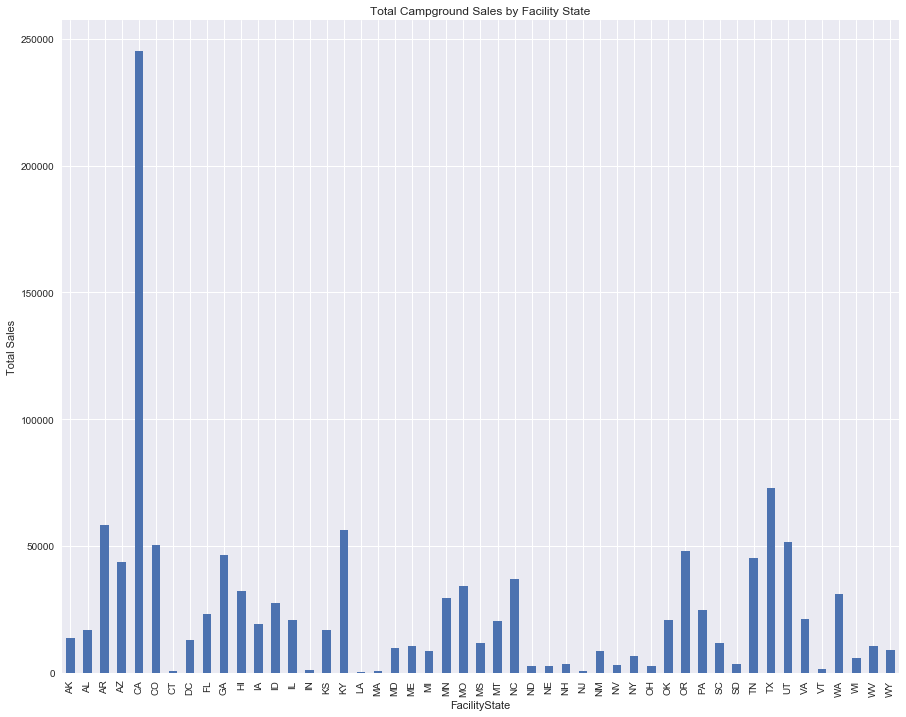

In [71]:
fig_size = plt.rcParams['figure.figsize']
var = df15s[['TotalPaid','FacilityState']].groupby('FacilityState').TotalPaid.sum()
fig = plt.figure()
fig_size[0] = 15
fig_size[1] = 12
ax1 = fig.add_subplot(1,1,1,)
ax1.set_xlabel('Facility State')
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Campground Sales by Facility State')
var.plot(kind = 'bar')

In [ ]:
df15s.groupby('CustomerCountry')['TotalPaid'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

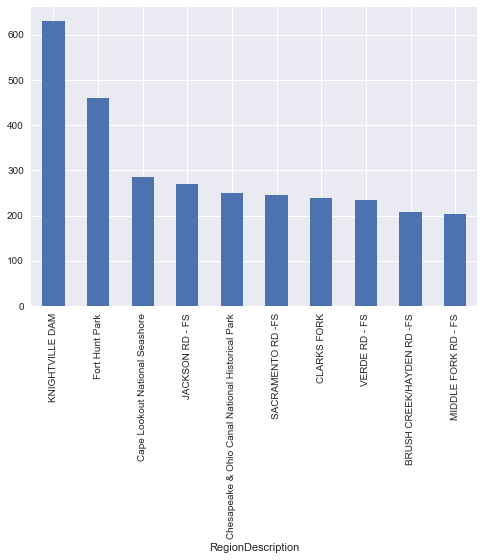

In [64]:
df15s.groupby('RegionDescription')['TotalPaid'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

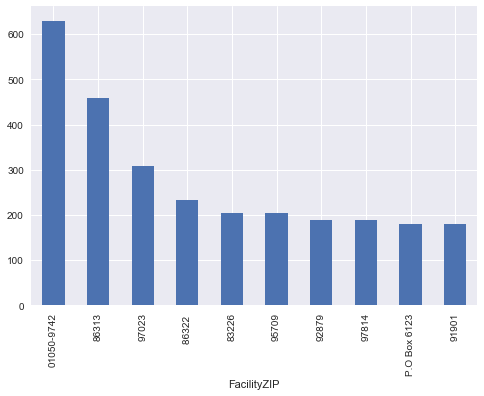

In [42]:
df15s.groupby('FacilityZIP')['TotalPaid'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

In [25]:
df15s['NumberOfPeople'].mode()

0    0
dtype: int64

In [49]:
df15s.loc[df15s['CustomerZIP']=='92121',['TotalPaid']].mean()

TotalPaid    25.691212
dtype: float64

In [68]:
df15s['NumberOfPeople'].value_counts().head() # The mode of 'NumberOfPeople' is 0 so more often than not, this field was not accounted for.


0    9710
2    6197
4    3263
6    2527
3    1865
Name: NumberOfPeople, dtype: int64

In [ ]:
df15s.groupby('CustomerCountry')['TotalPaid'].mean().sort_values(ascending=False).head(10).plot(kind='bar')


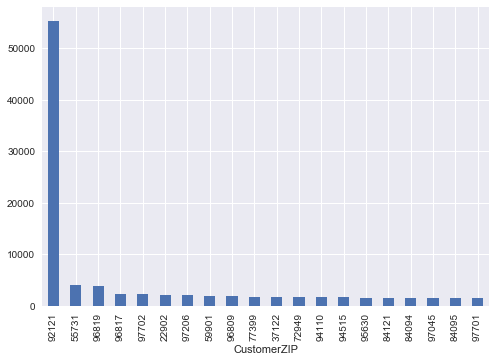

In [63]:
df15s.groupby('CustomerZIP')['TotalPaid'].sum().sort_values(ascending=False).head(20).plot(kind='bar')

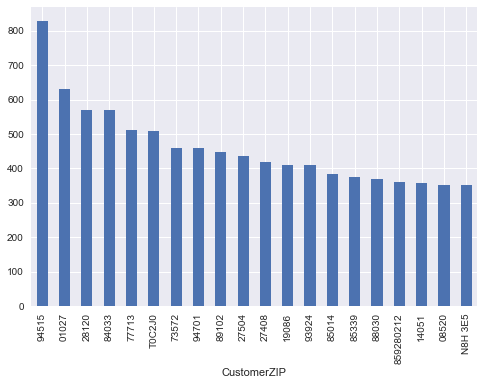

In [30]:
df15s.groupby('CustomerZIP')['TotalPaid'].mean().sort_values(ascending=False).head(20).plot(kind='bar')

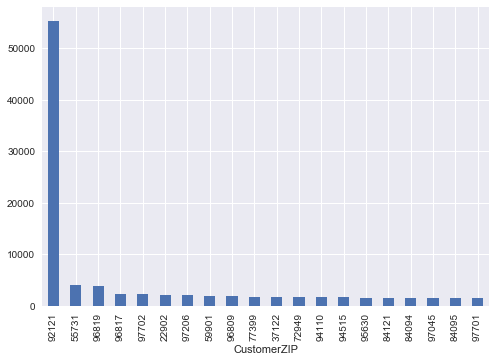

In [29]:
df15s.groupby('CustomerZIP')['TotalPaid'].sum().sort_values(ascending=False).head(20).plot(kind='bar')

In [69]:
df15s['CustomerCountry'].value_counts().head(10)

USA    28537
CAN      260
DEU      182
GBR       78
FRA       70
NLD       65
AUS       57
CHE       46
BEL       21
CZE       16
Name: CustomerCountry, dtype: int64

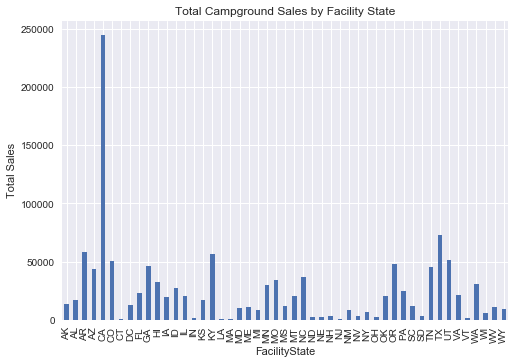

In [20]:
plt.show()

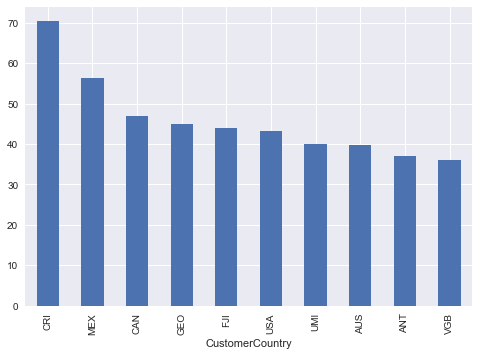

In [22]:
df15s.groupby('CustomerCountry')['TotalPaid'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
# Note that I took a sample of .01 so in this case, the number of customers from different countries "CustomerCountry" is very small in relation to the US.


In [23]:
#top_colors[:10].sort(ascending=0).plot(kind='barh')